## EDA and data cleaning

### Insights on the databases

***Demographic***:

1) 4 categorical variables (gender, number of accounts, calls in the last 6 months, and logons in the last 6 months)
2) 4 numerical variables (tenure_years, tenure_months, clients age, and balance)
3) 1 client_id
4) **Categorical variables info**:
   
   - Gender of clients quite uniformly distributed (F, M, and U = unspecified)
   - The majority of clients have 2 or 3 accounts
   - The majority of clients have done 6 calls in the last 6 months
   - The majority of clients have done 9 logons in the last 6 months, but many have also done between 3 and 7 logons
   - No correlation between gender and number of accounts

6) **Numerical variables info**:
   
   - The majority of clients have the accounts since 1 to 15 years, with a mean of 12 years ± 6 (std).
   - The mean age of the clients is 46 years ± 12 (std)
   - The balance of the accoutns is very variable, with a mean of 147,445 but a very high standard deviation of 301,508

***Clients experiment group***:

1) Clients subdivided in two groups having similar sample size:
   - Control --> 23532
   - Test --> 26968

2) Clients are identified by the unique client_id, regardless of how many accounts they have.

***Clients digital footprint***:

1) The activity of all clients is monitored.
2) Each client_id has different indexes relative to the activity (time and steps)
3) The activity is monitored via "start", 3 steps and confirm
4) Not all clients performed the activity uniformly, some go back and forth between steps before arriving at the confirm step

## EDA

1. Who are the primary clients using this online process?
2. Are the primary clients younger or older, new or long-standing?
3. Typical usage patterns of clients interacting with the online process? Are there specific times of day or days of the week when client's engagement is highest?

- The analysis showed that **Middle-age** (36-55 years) people are the primary clients using the online process, followed by Seniors (56-75 years) and Adults (21-35 years).
- All age categories of clients have the same average number of accounts (2.2).
- Middle-age clients have done more logons compared to other categories in the last 6 months
- Elderly, Senior and Middle-age clients have **long-standing accounts** (rounded average years since account activation: Elderly = 17, Senior = 14, Middle-age = 12)

- Clients start the sessions mostly in the **morning** (9-11), followed by lunch-time (12-14) and afternoon (15-18).
- The majority of the sessions are performed in the middle of the week, particularly on **Wednesdays**.

### Code : data exploration and exploratory analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

**Convert data files stored in "data" folder to Pandas dataframes and create copies to work on them**

In [7]:
file_demo = "../data/df_final_demo.txt"
delimiter = ","

In [8]:
file_final = "../data/df_final_experiment_clients.txt"
delimiter = ","

In [9]:
file_exp_1 = "../data/df_final_web_data_pt_1.txt"
delimiter = ","

file_exp_2 = "../data/df_final_web_data_pt_2.txt"
delimiter = ","

In [10]:
# Dataframe of account details of clients (demographic data)

df_demo_original = pd.read_csv(file_demo, delimiter=delimiter)
df_demo = df_demo_original.copy()
df_demo.to_csv("../data/df_demo.csv", index = False)

In [11]:
# Dataframe of final result of the clients involved in the experiment

df_final_original = pd.read_csv(file_final, delimiter=delimiter)
df_final = df_final_original.copy()
df_final.to_csv("../data/df_final.csv", index = False)

In [12]:
# Dataframe of clients digital footprints (clients online interactions) - part 1 and 2

df_exp_original_1 = pd.read_csv(file_exp_1, delimiter=delimiter)
df_exp_1 = df_exp_original_1.copy()
df_exp_original_2 = pd.read_csv(file_exp_2, delimiter=delimiter)
df_exp_2 = df_exp_original_2.copy()

In [13]:
# Merging the dataframes with data on digital footprints and saving the new csv file

df_exp = pd.concat([df_exp_1, df_exp_2], ignore_index = True)
df_exp.to_csv("../data/df_experiment_tot.csv", index = False)

In [14]:
df_exp.shape

(755405, 5)

In [15]:
df_demo.shape

(70609, 9)

In [16]:
df_final.shape

(70609, 2)

### Exploring **df_demo**

In [48]:
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [56]:
df_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [49]:
df_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [94]:
df_demo.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70609
bal                 70328
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

In [95]:
df_demo["logons_6_mnth"].unique()  # --> potential categorical

array([ 9.,  6.,  3.,  5.,  4.,  8.,  7., nan,  1.,  2.])

In [96]:
df_demo["num_accts"].unique()  # --> potential categorical

array([ 2.,  5.,  3.,  4.,  6.,  7., nan,  1.,  8.])

In [97]:
df_demo["calls_6_mnth"].unique()  # --> potential categorical

array([ 6.,  3.,  0.,  2.,  1.,  5.,  4., nan,  7.])

In [50]:
df_demo["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [17]:
def format_gender(gender):
    if gender == "M":
        return "M"
    elif gender == "F":
        return "F"
    elif gender == "U":
        return "U"
    else:
        return "Unknown"    

In [18]:
df_demo["gendr"] = df_demo["gendr"].apply(format_gender)

In [43]:
freq_gender = df_demo["gendr"].value_counts()
freq_gender

gendr
U          24122
M          23724
F          22746
Unknown       17
Name: count, dtype: int64

In [48]:
df_demo_filtered = df_demo[df_demo["gendr"] != "Unknown"]
freq_gender_filt = df_demo_filtered["gendr"].value_counts()
freq_gender_filt

gendr
U    24122
M    23724
F    22746
Name: count, dtype: int64

(0.0, 30000.0)

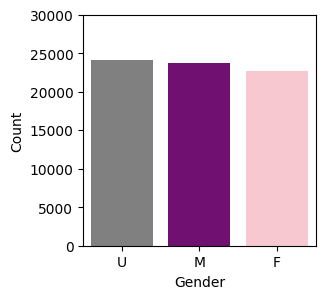

In [52]:
freq_gender_filt = df_demo_filtered["gendr"].value_counts()

plt.figure(figsize=(3,3))
palette = {"U" : "grey", "M" : "purple", "F" : "pink"}

sns.barplot(x = freq_gender_filt.index, y = freq_gender_filt.values, 
            hue = freq_gender_filt.index, legend = False, palette = palette)

plt.xlabel("Gender")
plt.ylabel("Count")
plt.ylim(0,30000)

In [21]:
freq_account = df_demo["num_accts"].value_counts()
freq_account

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: xlabel='num_accts'>

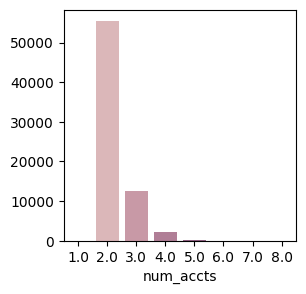

In [22]:
plt.figure(figsize=(3,3))
sns.barplot(x = freq_account.index, y = freq_account.values, hue = freq_account.index, legend = False)

In [24]:
freq_calls = df_demo["calls_6_mnth"].value_counts()
freq_calls

calls_6_mnth
6.0    14112
1.0    11016
2.0    10252
3.0     8752
0.0     7732
4.0     7175
5.0     6627
7.0     4929
Name: count, dtype: int64

<Axes: xlabel='calls_6_mnth'>

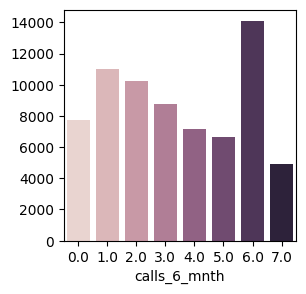

In [25]:
plt.figure(figsize=(3,3))
sns.barplot(x = freq_calls.index, y = freq_calls.values, hue = freq_calls.index, legend = False)

In [26]:
freq_logon = df_demo["logons_6_mnth"].value_counts()
freq_logon

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth'>

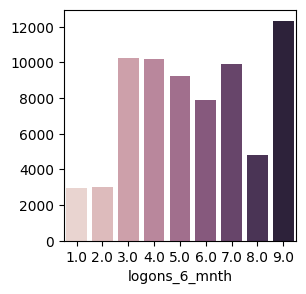

In [27]:
plt.figure(figsize=(3,3))
sns.barplot(x = freq_logon.index, y = freq_logon.values, hue = freq_logon.index, legend = False)

- Test to check for potential correlations between categorical variables

In [28]:
cross_gen_acc = pd.crosstab(index = df_demo["gendr"], columns = df_demo["num_accts"])
cross_gen_acc

num_accts,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
gendr,,,,,,,,
F,1,18379,3633,637,83,8,4,1
M,0,17373,5126,1051,147,23,4,0
U,1,19743,3769,553,54,2,0,0
Unknown,0,2,1,0,0,0,0,0


In [29]:
chi2_statistic, p_value, dof, expected = chi2_contingency(cross_gen_acc)
print(round(chi2_statistic, 2), p_value)

697.75 3.9651370433106605e-134


In [30]:
association(cross_gen_acc, method = "cramer")

0.05739878127405165

<Axes: xlabel='gendr', ylabel='count'>

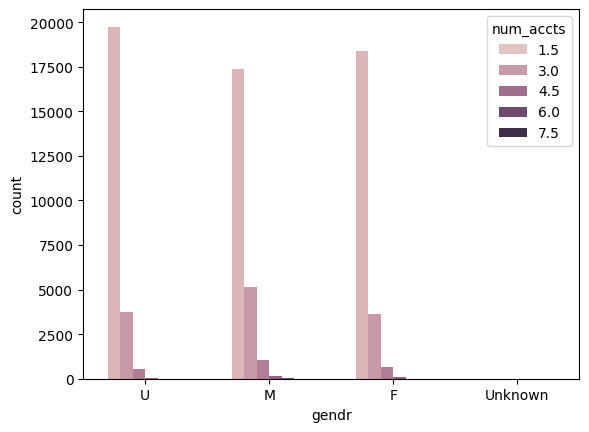

In [31]:
sns.countplot(data = df_demo, x = df_demo["gendr"], hue = df_demo["num_accts"])

**Association between gender and number of accounts** --> altough the chi2 test p-value is < 0.05 (potentially given by the "unknown" values almost equal to 0, Cramer's V value indicates that there is almost no association between the two variables.

In [32]:
df_demo_numerical = df_demo.select_dtypes("number").drop(columns = ["client_id", "logons_6_mnth", "num_accts", "calls_6_mnth"], axis = 1)

In [33]:
round(df_demo_numerical.describe(), 2)

,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,bal
count,70595.00,70595.00,70594.00,70595.00
mean,12.05,150.66,46.44,147445.24
std,6.87,82.09,15.59,301508.71
min,2.00,33.00,13.50,13789.42
25%,6.00,82.00,32.50,37346.84
50%,11.00,136.00,47.00,63332.90
75%,16.00,192.00,59.00,137544.90
max,62.00,749.00,96.00,16320040.15


array([[<Axes: title={'center': 'clnt_tenure_yr'}>,
        <Axes: title={'center': 'clnt_tenure_mnth'}>],
       [<Axes: title={'center': 'clnt_age'}>,
        <Axes: title={'center': 'bal'}>]], dtype=object)

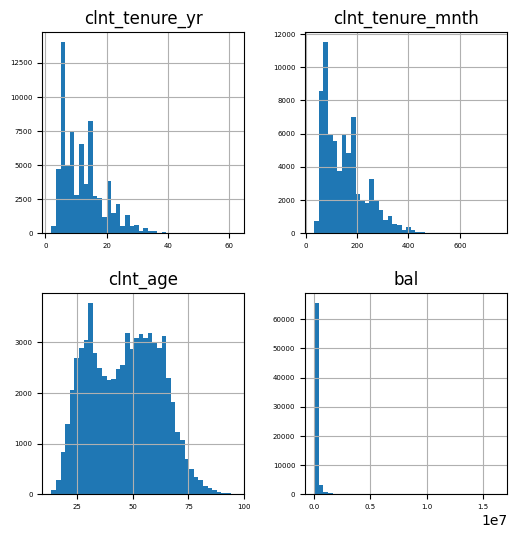

In [34]:
df_demo_numerical.hist(figsize = (6,6), bins = 40, xlabelsize = 5, ylabelsize = 5)

In [35]:
def histo_numerical(df, column):
    column_data = df[column]

    skewness = column_data.skew()
    kurtosis = column_data.kurtosis()
    print(f"""Distribution measures:
    Skewness: {skewness}
    Kurtosis: {kurtosis}""")

    plt.figure(figsize = (3,3))
    sns.histplot(column_data, bins = 20, kde = True)

In [36]:
def centrality_dispersion(df, column):
    
    column_data = df[column]
    
    mean = column_data.mean().round(2)
    median = column_data.median()
    mode = column_data.mode()[0]
    variance = round(column_data.var(), 2)
    std_dev = round(column_data.std(), 2)

    print(f"""Measures of centrality and dispersion for {column}:
    Mean: {mean}
    Median: {median}
    Mode: {mode}
    Variance: {variance}
    Standard deviation: {std_dev}""")

    result = {
        "Mean": mean,
        "Median": median,
        "Mode": mode,
        "Variance": variance,
        "Standard Deviation": std_dev
    }

    return result

Distribution measures:
    Skewness: 1.0366465399008236
    Kurtosis: 1.0709771210550496


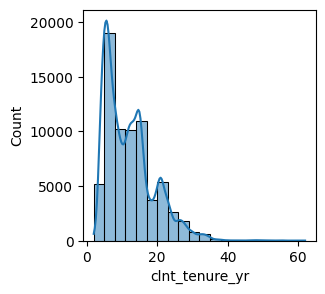

In [37]:
histo_numerical(df_demo, "clnt_tenure_yr")

In [38]:
results = centrality_dispersion(df_demo, "clnt_tenure_yr")

Measures of centrality and dispersion for clnt_tenure_yr:
    Mean: 12.05
    Median: 11.0
    Mode: 6.0
    Variance: 47.22
    Standard deviation: 6.87


Distribution measures:
    Skewness: 0.08182349158703763
    Kurtosis: -0.9271048487356293


Text(0.5, 0, 'Client Age')

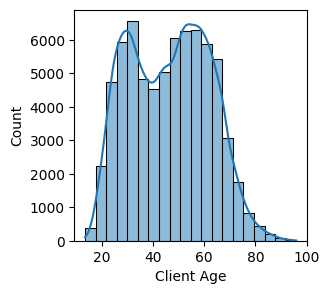

In [72]:
histo_numerical(df_demo, "clnt_age")
plt.xlabel("Client Age")

In [40]:
results = centrality_dispersion(df_demo, "clnt_age")

Measures of centrality and dispersion for clnt_age:
    Mean: 46.44
    Median: 47.0
    Mode: 58.5
    Variance: 243.09
    Standard deviation: 15.59


Distribution measures:
    Skewness: 11.164366675931957
    Kurtosis: 278.2072251784584


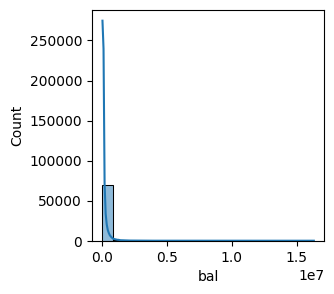

In [41]:
histo_numerical(df_demo, "bal")

In [42]:
results = centrality_dispersion(df_demo, "bal")

Measures of centrality and dispersion for bal:
    Mean: 147445.24
    Median: 63332.9
    Mode: 31188.62
    Variance: 90907500113.94
    Standard deviation: 301508.71


### Exploring **df_exp**

In [171]:
df_exp.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [58]:
df_exp.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

### Exploring **df_final**

In [59]:
df_final.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [12]:
df_final.isnull().any()

client_id    False
Variation     True
dtype: bool

In [13]:
df_final["Variation"].unique()

array(['Test', 'Control', nan], dtype=object)

In [16]:
# Replace nan values with "Not included" (in the experiment)

def replace_nan(value):
    
    if value == "Test":
        return "Test"
    elif value == "Control":
        return "Control"
    else:
        return "Not included"

In [17]:
df_final["Variation"] = df_final["Variation"].map(replace_nan)

In [18]:
df_final["Variation"].unique()

array(['Test', 'Control', 'Not included'], dtype=object)

In [11]:
df_final.dtypes

client_id     int64
Variation    object
dtype: object

In [21]:
df_final.duplicated().any()

False

In [30]:
df_group = df_final.groupby("Variation")[["client_id"]].count().sort_values(by = "client_id", ascending=False)
df_group

,client_id
Variation,
Test,26968
Control,23532
Not included,20109


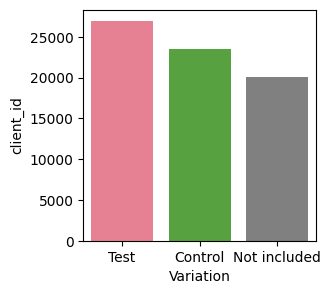

In [74]:
plt.figure(figsize=(3,3))

plot = sns.barplot(data = df_group, x = "Variation", y = "client_id", hue = "Variation", palette = "husl")
plot.patches[2].set_facecolor('gray')

**1./2. Who are the primary clients**

In [ ]:
histo_numerical

In [34]:
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [54]:
def categ_age(age):
    if isinstance(age, float):
        if 0 <= age <= 15:
            return "Kid/Teenager"
        elif 16 <= age <= 20:
            return "Young adult"
        elif 21 <= age <= 35:
            return "Adult"
        elif 36 <= age <= 55:
            return "Middle-age"
        elif 56 <= age <= 75:
            return "Senior"
        elif 76 <= age <= 100:
            return "Elderly"
    else:
        return "Unknown"

In [55]:
df_demo["age_category"] = df_demo["clnt_age"].map(categ_age)

In [56]:
age_freq = df_demo["age_category"].value_counts()
age_freq

age_category
Middle-age      25575
Senior          20825
Adult           19269
Elderly          1451
Young adult      1394
Kid/Teenager       48
Name: count, dtype: int64

(0.0, 30000.0)

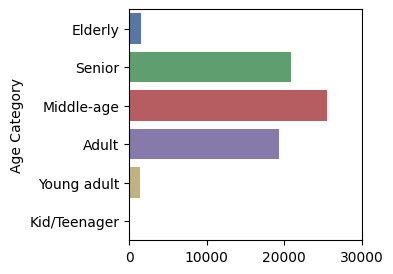

In [70]:
palette_deep = {"Elderly" : "#4C72B0", "Senior":"#55A868", "Middle-age":"#C44E52", 
                "Adult":"#8172B2", "Young adult": "#CCB974", "Kid/Teenager":"#64B5CD"}
plt.figure(figsize=(3,3))
sns.barplot(y = age_freq.index, x = age_freq.values, hue = age_freq.index, legend = False, palette = palette_deep,  
            order = ["Elderly", "Senior", "Middle-age", "Adult", "Young adult", "Kid/Teenager"])

plt.ylabel("Age Category")
plt.xlim(0, 30000)

In [61]:
df_age_acc = df_demo.groupby("age_category")[["num_accts"]].mean().sort_values(by = "num_accts", ascending=False)
df_age_acc

,num_accts
age_category,
Adult,2.268255
Middle-age,2.259941
Senior,2.238992
Elderly,2.236389
Kid/Teenager,2.229167
Young adult,2.227403


In [62]:
df_age_yr_mnth = df_demo.groupby("age_category").agg({"clnt_tenure_yr":"mean", "clnt_tenure_mnth":"mean"}).round(1).sort_values(by = "clnt_tenure_yr", ascending=False)
df_age_yr_mnth

,clnt_tenure_yr,clnt_tenure_mnth
age_category,,
Elderly,17.3,213.3
Senior,14.0,173.8
Middle-age,12.4,155.1
Adult,9.3,118.1
Young adult,9.0,113.9
Kid/Teenager,8.1,103.8


Text(0.5, 0, 'Tenure Years')

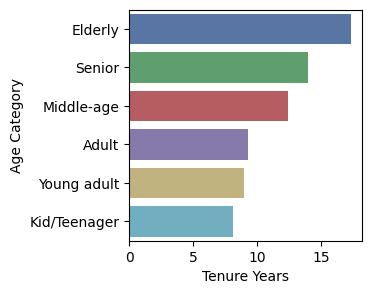

In [71]:
plt.figure(figsize=(3,3))
sns.barplot(data = df_age_yr_mnth, x = "clnt_tenure_yr",y = "age_category", hue = "age_category", 
            palette = palette_deep, order = ["Elderly", "Senior", "Middle-age", "Adult", "Young adult", "Kid/Teenager"])
plt.ylabel("Age Category")
plt.xlabel("Tenure Years")


In [184]:
crosstab = pd.crosstab(df_demo["age_category"], df_demo["logons_6_mnth"])
crosstab

logons_6_mnth,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
age_category,,,,,,,,,
Adult,881,903,2781,2779,2398,1979,2714,1165,3669
Elderly,24,30,146,184,193,181,215,131,347
Kid/Teenager,11,10,7,4,4,8,4,0,0
Middle-age,1243,1201,4238,4014,3357,2748,3287,1656,3831
Senior,565,621,2525,2675,2897,2611,3179,1673,4079
Young adult,108,139,234,237,183,137,229,41,86


<Axes: xlabel='logons_6_mnth', ylabel='age_category'>

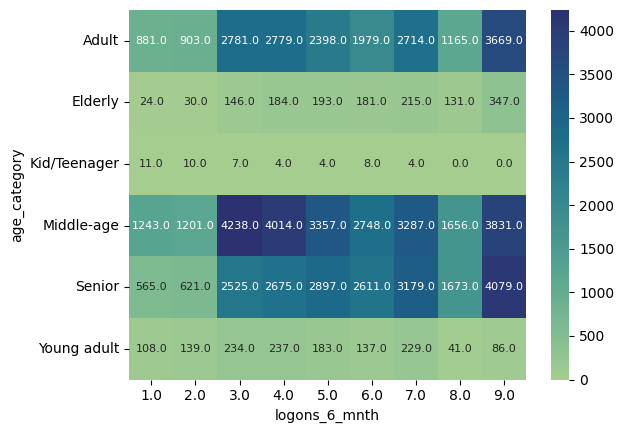

In [182]:
sns.heatmap(crosstab, annot = True, annot_kws={"size": 8}, cmap="crest", fmt=".1f")

**3. Typical usage patterns**

In [80]:
df_exp.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [139]:
merge_df = pd.merge(df_demo, df_exp, on = "client_id")
merge_df.head(1)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_category,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Senior,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13


In [92]:
age_visits = merge_df.groupby("age_category")[["visit_id"]].count().sort_values(by = "visit_id", ascending = False)
age_visits

,visit_id
age_category,
Middle-age,158876
Senior,145335
Adult,111920
Elderly,10961
Young adult,8282
Kid/Teenager,286


### Specific time of the day with high engagement?

In [105]:
merge_df["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 449831 entries, 0 to 449830
Series name: date_time
Non-Null Count   Dtype 
--------------   ----- 
449831 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [141]:
merge_df["date_time"] = pd.to_datetime(merge_df["date_time"])

In [107]:
merge_df["hour"] = merge_df["date_time"].dt.hour

In [108]:
merge_df["hour"].unique()

array([11, 10,  9, 19, 14, 13, 16, 12, 20, 21, 22, 18, 15, 23, 17,  6,  5,
        7,  0,  8,  4,  3,  1,  2])

In [110]:
def categ_hour(hour):
    if 0 <= hour <= 4:
        return "Night"
    elif 5 <= hour <= 8:
        return "Early morning"
    elif 9 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 14:
        return "Lunch-time"
    elif 14 <= hour <= 18:
        return "Afternoon"
    elif 19 <= hour <= 23:
        return "Evening"

In [111]:
merge_df["hour"] = merge_df["hour"].map(categ_hour)

In [112]:
merge_df["hour"].unique()

array(['Morning', 'Evening', 'Lunch-time', 'Afternoon', 'Early morning',
       'Night'], dtype=object)

In [136]:
# Filtering the merged df to check at what time of the day clients START the sessions

merge_start_visit = merge_df[ merge_df["process_step"] == "start"]

In [137]:
visits_hour = merge_start_visit.groupby("hour")[["visit_id"]].count().sort_values(by = "visit_id", ascending = False)
visits_hour

,visit_id
hour,
Morning,33779
Lunch-time,33457
Afternoon,32604
Evening,29960
Early morning,10226
Night,5562


<Axes: xlabel='visit_id', ylabel='hour'>

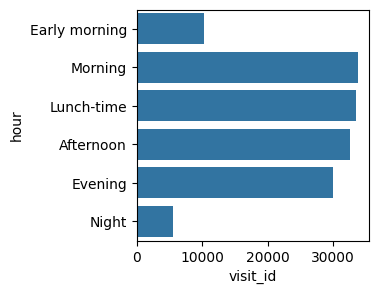

In [138]:
plt.figure(figsize=(3,3))
sns.barplot(data = visits_hour, y = "hour", x = "visit_id", order = ["Early morning", "Morning", "Lunch-time", "Afternoon", "Evening", "Night"])

### Specific day of the week with high engagement?

In [163]:
merge_start_visit["day"] = merge_start_visit["date_time"].dt.dayofweek
merge_start_visit["day"].unique()

array([6, 2, 3, 4, 5, 0, 1])

In [159]:
def week_day(day):
    if day == 0:
        return "Monday"
    elif day == 1:
        return "Tuesday"
    elif day == 2:
        return "Wednesday"
    elif day == 3:
        return "Thursday"
    elif day == 4:
        return "Friday"
    elif day == 5:
        return "Saturday"
    elif day == 6:
        return "Sunday"

In [164]:
merge_start_visit["day"] = merge_start_visit["day"].map(week_day)

In [165]:
merge_start_visit["day"].unique()

array(['Sunday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Monday',
       'Tuesday'], dtype=object)

In [166]:
visits_day = merge_start_visit.groupby("day")[["visit_id"]].count().sort_values(by = "visit_id", ascending = False)
visits_day

,visit_id
day,
Wednesday,43337
Thursday,22280
Sunday,17267
Friday,16945
Monday,16655
Tuesday,15091
Saturday,14013


<Axes: xlabel='visit_id', ylabel='day'>

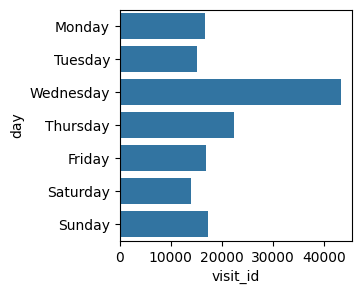

In [170]:
plt.figure(figsize=(3,3))
sns.barplot(data = visits_day, y = "day", x = "visit_id", order = ["Monday","Tuesday", "Wednesday","Thursday", 
                                                                   "Friday", "Saturday","Sunday"])